In [1]:
import numpy as np
import pygrgl
import matplotlib.pyplot as plt

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals, normalize_genetic_values
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import normalize
from grg_pheno_sim.split import split_phenotypes


The following command only serves the purpose of converting the VCF zip file into a GRG that will be used for the phenotype simulation.

In [2]:
%%script bash --out /dev/null
if [ ! -f test-200-samples.grg ]; then
  grg construct -p 10 -t 2 ../data/test-200-samples.vcf.gz --out-file test-200-samples.grg
fi

In [3]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.grg") #loading in a sample grg stored in the same directory


In [4]:
rng = np.random.default_rng()

mean_1 = np.zeros(2)
cov_1 = np.eye(2) 
model_normal_multi = grg_causal_mutation_model("multivariate normal", mean=mean_1, cov=cov_1)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_normal_multi.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [[-0.27096751 -0.56890577]
 [ 2.89675369  1.21790578]
 [-0.00320249  1.80948873]
 ...
 [-0.18955141 -0.98228516]
 [-1.44096537 -0.09142287]
 [-0.24633039  0.18374372]]


In [5]:
trait_df_normal_multi = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_normal_multi, random_seed=1)
sample_nodes_df_multi = additive_effect_sizes(grg_1, trait_df_normal_multi)
individuals = samples_to_individuals(sample_nodes_df_multi)
normalized_individual_multi_normal = normalize_genetic_values(individuals)


First, we will demonstrate how to simulate user-defined noise for multiple causal mutations (if the user does not want to use the h2 heritability feature). In this case, the user must specify the mean and covariance matrix to be used.

In [6]:
std_means = np.array([0, 0])
std_covariances = np.array([[1, 0], [0, 1]])
phenotypes_user_defined_multi_normal = sim_env_noise(individuals, user_defined=True, means=std_means, cov=std_covariances) #simulates noise from the multivariate standard normal distribution with means of zero and an identity matrix for covariance
phenotypes_user_defined_multi_normal_df = phenotypes_user_defined_multi_normal.phenotype_df
phenotypes_user_defined_multi_normal_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-37.942379,-0.475254,-38.417633
1,1,0,-23.087706,-1.527112,-24.614818
2,0,1,-19.908226,0.229819,-19.678407
3,1,1,-22.240029,-0.720554,-22.960583
4,0,2,-9.933216,0.926386,-9.006830
...,...,...,...,...,...
395,1,197,6.632294,1.500540,8.132834
396,0,198,-28.121344,-0.563309,-28.684653
397,1,198,-17.527029,1.200423,-16.326606
398,0,199,-10.601552,-1.096427,-11.697980


The user can extract the h2 assigned to any phenotype simulation as follows.

In [7]:
user_defined_multi_h2 = phenotypes_user_defined_multi_normal.get_h2()
print(user_defined_multi_h2)

[1.01467029 0.98438428]


In [8]:
split_phenotypes(phenotypes_user_defined_multi_normal_df, return_print=True)

     causal_mutation_id  individual_id  genetic_value  environmental_noise  \
0                     0              0     -37.942379            -0.475254   
2                     0              1     -19.908226             0.229819   
4                     0              2      -9.933216             0.926386   
6                     0              3     -16.476328             0.391828   
8                     0              4     -39.004838            -0.132589   
..                  ...            ...            ...                  ...   
390                   0            195     -20.002154            -0.187864   
392                   0            196     -27.360933             0.309592   
394                   0            197     -23.888838             0.999855   
396                   0            198     -28.121344            -0.563309   
398                   0            199     -10.601552            -1.096427   

     phenotype  
0   -38.417633  
2   -19.678407  
4    -9.0068

In [9]:
split_phenotypes_list = split_phenotypes(phenotypes_user_defined_multi_normal_df, return_list=True)
split_phenotypes_list[0] #the first dataframe

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-37.942379,-0.475254,-38.417633
2,0,1,-19.908226,0.229819,-19.678407
4,0,2,-9.933216,0.926386,-9.006830
6,0,3,-16.476328,0.391828,-16.084500
8,0,4,-39.004838,-0.132589,-39.137427
...,...,...,...,...,...
390,0,195,-20.002154,-0.187864,-20.190018
392,0,196,-27.360933,0.309592,-27.051341
394,0,197,-23.888838,0.999855,-22.888983
396,0,198,-28.121344,-0.563309,-28.684653


In [10]:
split_phenotypes_list[1] #the second dataframe

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
1,1,0,-23.087706,-1.527112,-24.614818
3,1,1,-22.240029,-0.720554,-22.960583
5,1,2,-30.900956,-0.130988,-31.031945
7,1,3,-27.909054,-0.433916,-28.342970
9,1,4,10.082859,0.415397,10.498256
...,...,...,...,...,...
391,1,195,0.216175,2.531190,2.747365
393,1,196,-26.683542,1.137024,-25.546518
395,1,197,6.632294,1.500540,8.132834
397,1,198,-17.527029,1.200423,-16.326606


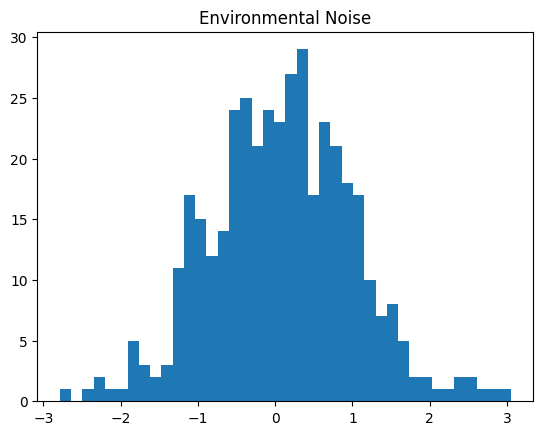

Mean of noise: 0.0859278825254848
Standard deviation of noise: 0.9269625584831296


In [11]:

plt.hist(phenotypes_user_defined_multi_normal_df["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotypes_user_defined_multi_normal_df['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotypes_user_defined_multi_normal_df['environmental_noise'].std()))

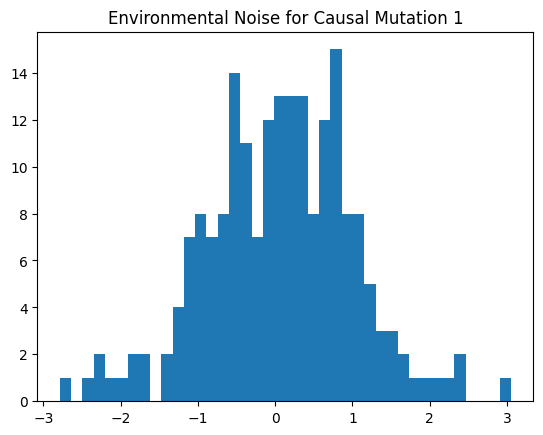

Mean of noise: 0.06248998924552895
Standard deviation of noise: 0.959824732422615


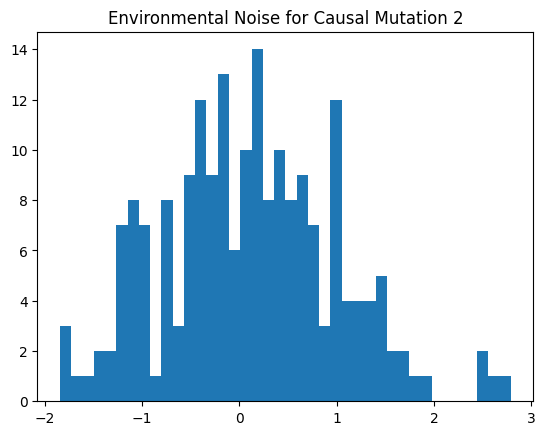

Mean of noise: 0.10936577580544063
Standard deviation of noise: 0.8946895268270454


In [12]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in phenotypes_user_defined_multi_normal_df.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [13]:
phenotypes_user_defined_multi_normal_df_normalized = normalize(phenotypes_user_defined_multi_normal)
phenotypes_user_defined_multi_normal_df_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-1.477386,-0.051470,-1.528856
1,1,0,-0.969737,-0.136084,-1.105820
2,0,1,0.248740,0.016016,0.264756
3,1,1,-0.899247,-0.069013,-0.968260
4,0,2,1.203491,0.082687,1.286178
...,...,...,...,...,...
395,1,197,1.501670,0.115685,1.617355
396,0,198,-0.537373,-0.059898,-0.597271
397,1,198,-0.507331,0.090728,-0.416603
398,0,199,1.139521,-0.110925,1.028597


In [14]:
means = np.array([0, 0])
covariance = np.array([[1, 0.25], [0.25, 1]])
phenotypes_user_defined_multi_normal_special_cov = sim_env_noise(individuals, user_defined=True, means=means, cov=covariance) #simulating noise using a user-defined covariance matrix instead of the identity matrix
phenotypes_user_defined_multi_normal_special_cov_df = phenotypes_user_defined_multi_normal_special_cov.phenotype_df
phenotypes_user_defined_multi_normal_special_cov_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-37.942379,0.632033,-37.310347
1,1,0,-23.087706,0.290295,-22.797411
2,0,1,-19.908226,0.201993,-19.706233
3,1,1,-22.240029,-0.555066,-22.795095
4,0,2,-9.933216,-0.536237,-10.469453
...,...,...,...,...,...
395,1,197,6.632294,0.408216,7.040510
396,0,198,-28.121344,-0.077432,-28.198777
397,1,198,-17.527029,-0.333004,-17.860033
398,0,199,-10.601552,0.569661,-10.031891


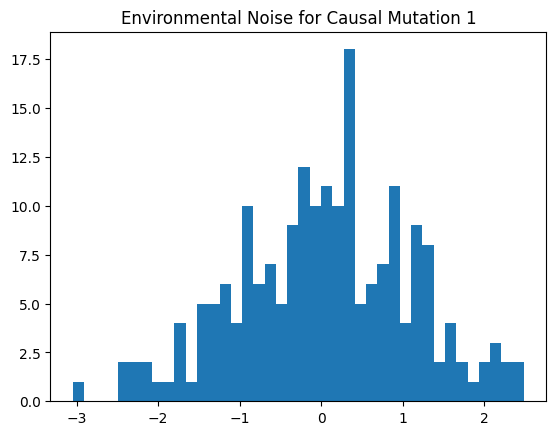

Mean of noise: 0.04326198775376322
Standard deviation of noise: 1.0730914796374784


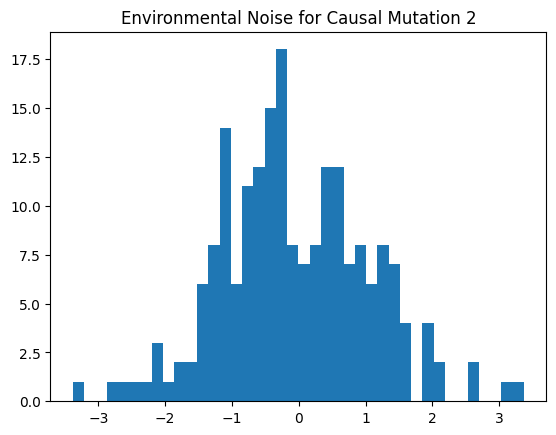

Mean of noise: -0.057650466067808326
Standard deviation of noise: 1.1156732174205992


In [15]:
df_dict_test_cov = {k: v.sort_values('individual_id') for k, v in phenotypes_user_defined_multi_normal_special_cov_df.groupby('causal_mutation_id')}

num = len(df_dict_test_cov)

for i in range(num):
  temp_df = df_dict_test_cov[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [16]:
phenotypes_user_defined_multi_normal_special_cov_df_normalized = normalize(phenotypes_user_defined_multi_normal_special_cov, normalize_genetic_values=True)
phenotypes_user_defined_multi_normal_special_cov_df_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-1.454871,0.055495,-1.399376
1,1,0,-0.973949,0.029060,-0.944889
2,0,1,0.244949,0.014961,0.259910
3,1,1,-0.903153,-0.041543,-0.944696
4,0,2,1.185150,-0.054621,1.130529
...,...,...,...,...,...
395,1,197,1.508193,0.038908,1.547101
396,0,198,-0.529183,-0.011376,-0.540559
397,1,198,-0.509535,-0.022997,-0.532532
398,0,199,1.122155,0.049616,1.171771


In [17]:
phenotypes_zero_noise = sim_env_noise(individuals) #simulates zero noise (assumes h2 is an array of 1s)
phenotypes_zero_noise_df = phenotypes_zero_noise.phenotype_df
phenotypes_zero_noise_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-37.942379,0.0,-37.942379
1,1,0,-23.087706,0.0,-23.087706
2,0,1,-19.908226,0.0,-19.908226
3,1,1,-22.240029,0.0,-22.240029
4,0,2,-9.933216,0.0,-9.933216
...,...,...,...,...,...
395,1,197,6.632294,0.0,6.632294
396,0,198,-28.121344,0.0,-28.121344
397,1,198,-17.527029,0.0,-17.527029
398,0,199,-10.601552,0.0,-10.601552


Now, we show the usage of the narrow-sense heritability feature to simulate noise for multiple causal mutations (for a dataframe where genetic values have not yet been normalized).

In [18]:
phenotype_multi_normal_h2 = sim_env_noise(individuals, h2=[0.5, 0.75]) #simulating environmental noise for 2 causal mutations without normalizing genetic values
phenotype_multi_normal_h2_df = phenotype_multi_normal_h2.phenotype_df
phenotype_multi_normal_h2_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-37.942379,-3.617869,-41.560248
1,1,0,-23.087706,1.045720,-22.041986
2,0,1,-19.908226,-9.597575,-29.505802
3,1,1,-22.240029,1.383524,-20.856505
4,0,2,-9.933216,2.409710,-7.523507
...,...,...,...,...,...
395,1,197,6.632294,1.385538,8.017832
396,0,198,-28.121344,6.898475,-21.222869
397,1,198,-17.527029,-11.516858,-29.043887
398,0,199,-10.601552,23.749570,13.148018


In [19]:
print(phenotype_multi_normal_h2.get_h2()) #printing the h2 used for the simulation

[0.5, 0.75]


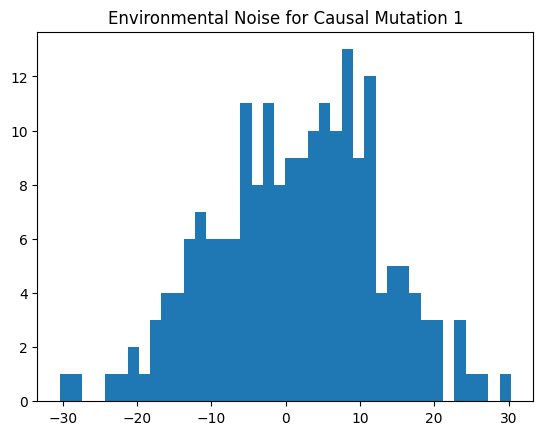

Mean of noise: 1.5266080424037858
Standard deviation of noise: 11.075658784130338


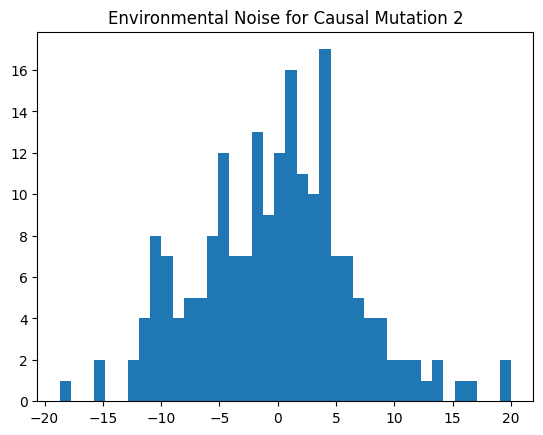

Mean of noise: -0.24102061082779122
Standard deviation of noise: 6.678522347536484


In [20]:
df_dict_test_pre_normal = {k: v.sort_values('individual_id') for k, v in phenotype_multi_normal_h2_df.groupby('causal_mutation_id')}

num = len(df_dict_test_pre_normal)

for i in range(num):
  temp_df = df_dict_test_pre_normal[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [21]:
phenotype_multi_normal_h2_df_normalized = normalize(phenotype_multi_normal_h2, normalize_genetic_values=True)
phenotype_multi_normal_h2_df_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.971462,-0.323780,-1.295242
1,1,0,-0.853800,0.094208,-0.759592
2,0,1,0.163560,-0.700127,-0.536567
3,1,1,-0.791738,0.118940,-0.672798
4,0,2,0.791361,0.055580,0.846941
...,...,...,...,...,...
395,1,197,1.322139,0.119088,1.441226
396,0,198,-0.353352,0.338091,-0.015261
397,1,198,-0.446677,-0.825556,-1.272234
398,0,199,0.749298,1.398655,2.147953


In [22]:
df_dict_test_pre_normal_final = {k: v.sort_values('individual_id') for k, v in phenotype_multi_normal_h2_df_normalized.groupby('causal_mutation_id')}

num = len(df_dict_test_pre_normal_final)

for i in range(num):
  temp_df = df_dict_test_pre_normal_final[i]
  print("Variance of the phenotypes for Causal Mutation " + str(i+1) + " is "  + str(temp_df['phenotype'].var()))
  print("Variance of the genetic values for Causal Mutation " + str(i+1) + " is "  + str(temp_df['genetic_value'].var()))
  print("Variance of the noise for Causal Mutation " + str(i+1) + " is "  + str(temp_df['environmental_noise'].var()))

Variance of the phenotypes for Causal Mutation 1 is 0.9999999999999997
Variance of the genetic values for Causal Mutation 1 is 0.4350721680449264
Variance of the noise for Causal Mutation 1 is 0.48591067737101745
Variance of the phenotypes for Causal Mutation 2 is 1.0000000000000002
Variance of the genetic values for Causal Mutation 2 is 0.7587880694773513
Variance of the noise for Causal Mutation 2 is 0.23908731450695792


Now, we show the usage of the narrow-sense heritability feature to simulate noise for multiple causal mutations (for a dataframe where genetic values have already been normalized).

In [23]:
phenotype_post_normalization = sim_env_noise(normalized_individual_multi_normal, h2=[0.25, 0.45]) #simulating noise after genetic values have been normalized
phenotype_df_post_normalization = phenotype_post_normalization.phenotype_df
phenotype_df_post_normalization

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-1.472805,2.728147,1.255342
1,1,0,-0.980158,0.410333,-0.569825
2,0,1,0.247969,-1.099811,-0.851842
3,1,1,-0.908911,-0.755492,-1.664403
4,0,2,1.199759,0.624113,1.823872
...,...,...,...,...,...
395,1,197,1.517808,-0.609659,0.908149
396,0,198,-0.535707,1.821342,1.285635
397,1,198,-0.512783,0.593221,0.080438
398,0,199,1.135988,-3.043003,-1.907015


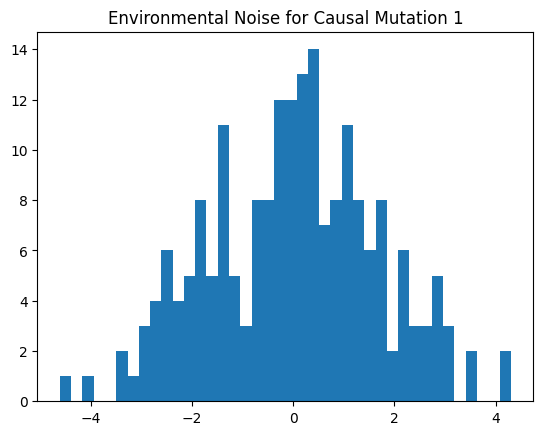

Mean of noise: 0.022247763139870615
Standard deviation of noise: 1.6873105628740541


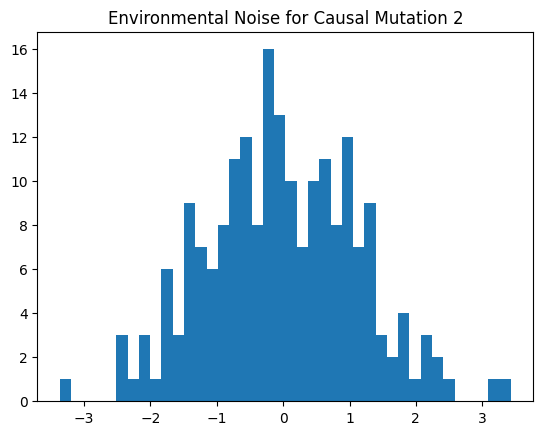

Mean of noise: -0.018272412687731113
Standard deviation of noise: 1.136934184095025


In [24]:
df_dict_test_post_normal = {k: v.sort_values('individual_id') for k, v in phenotype_df_post_normalization.groupby('causal_mutation_id')}

num = len(df_dict_test_post_normal)

for i in range(num):
  temp_df = df_dict_test_post_normal[i]
  plt.hist(temp_df["environmental_noise"], bins=40)
  plt.title("Environmental Noise for Causal Mutation " + str(i+1) )
  plt.show()
  print("Mean of noise: " + str(temp_df['environmental_noise'].mean()))
  print("Standard deviation of noise: " + str(temp_df['environmental_noise'].std()))

In [25]:
phenotype_post_normalization_final_df = normalize(phenotype_post_normalization) #normalizing the final dataframe with the phenotypes
phenotype_post_normalization_final_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.767188,1.409511,0.642322
1,1,0,-0.630729,0.275807,-0.354923
2,0,1,0.129168,-0.584483,-0.455316
3,1,1,-0.584882,-0.474399,-1.059281
4,0,2,0.624958,0.313513,0.938471
...,...,...,...,...,...
395,1,197,0.976706,-0.380556,0.596150
396,0,198,-0.279051,0.937153,0.658102
397,1,198,-0.329975,0.393495,0.063520
398,0,199,0.591739,-1.596698,-1.004958


In [26]:
df_dict_test_post_normal_final = {k: v.sort_values('individual_id') for k, v in phenotype_post_normalization_final_df.groupby('causal_mutation_id')}

num = len(df_dict_test_post_normal_final)

for i in range(num):
  temp_df = df_dict_test_post_normal_final[i]
  print("Variance of the phenotypes for Causal Mutation " + str(i+1) + " is "  + str(temp_df['phenotype'].var()))
  print("Variance of the genetic values for Causal Mutation " + str(i+1) + " is "  + str(temp_df['genetic_value'].var()))
  print("Variance of the noise for Causal Mutation " + str(i+1) + " is "  + str(temp_df['environmental_noise'].var()))

Variance of the phenotypes for Causal Mutation 1 is 1.0
Variance of the genetic values for Causal Mutation 1 is 0.27133971578647037
Variance of the noise for Causal Mutation 1 is 0.7725087661412705
Variance of the phenotypes for Causal Mutation 2 is 1.0000000000000002
Variance of the genetic values for Causal Mutation 2 is 0.41408937425532083
Variance of the noise for Causal Mutation 2 is 0.5352599332218547
